## 2.2 モデルの作成

### 2.2.1　ニューラルネットワーク

In [1]:
import os
import torch
import random
import numpy as np
import matplotlib.pyplot as plt

from tqdm import tqdm
from torch import nn, optim
from sklearn.datasets import load_digits
from torch.utils.data import DataLoader, TensorDataset

In [2]:
plt.rcParams['figure.figsize'] = (5, 5)

In [3]:
def seed_torch(seed=1485):
  random.seed(seed)
  os.environ['PYTHONHASHSEED'] = str(seed)
  np.random.seed(seed)
  torch.manual_seed(seed)
  torch.cuda.manual_seed(seed)
  torch.backends.cudnn.deterministic = True

In [4]:
seed_torch()

In [5]:
digits = load_digits()
X = digits.data
y = digits.target
print(X.shape, y.shape)

(1797, 64) (1797,)


In [6]:
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.int64)

In [7]:
model = nn.Sequential(
    nn.Linear(64, 32),
    nn.ReLU(),
    nn.Linear(32, 16),
    nn.ReLU(),
    nn.Linear(16, 10)
)

model.train()
lossfun = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [8]:
losses = []

for ep in range(100):
  optimizer.zero_grad()
  out = model(X)

  loss = lossfun(out, y)
  loss.backward()

  optimizer.step()

  losses.append(loss.item())

In [9]:
_, pred = torch.max(out, 1)
print((pred == y).sum().item() / len(y))

0.8280467445742905


Text(0, 0.5, 'loss')

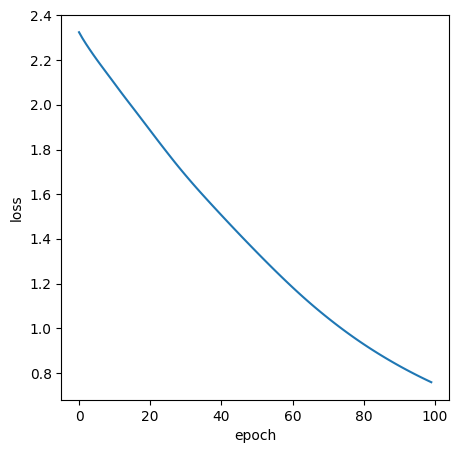

In [10]:
plt.plot(losses)
plt.xlabel('epoch')
plt.ylabel('loss')

In [11]:
def train_1epoch(model, train_loader, lossfun, optimizer, device):
  model.train()
  total_loss, total_acc = 0.0, 0.0

  for x, y in tqdm(train_loader):
    x = x.to(device)
    y = y.to(device)

    optimizer.zero_grad()
    out = model(x)

    loss = lossfun(out, y)
    loss.backward()

    optimizer.step()

    total_loss += loss.item() * x.size(0)

    _, pred = torch.max(out, 1)
    total_acc += torch.sum(pred == y.data)

  avg_loss = total_loss / len(train_loader.dataset)
  avg_acc = total_acc / len(train_loader.dataset)
  return avg_acc, avg_loss

In [12]:
seed_torch()
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [13]:
digits = load_digits()
X = digits.data
y = digits.target

X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.int64)

dataset = TensorDataset(X, y)
train_loader = DataLoader(dataset, batch_size=64, shuffle=True)

In [14]:
model = nn.Sequential(
    nn.Linear(64, 32),
    nn.ReLU(),
    nn.Linear(32, 16),
    nn.ReLU(),
    nn.Linear(16, 10)
)

model = model.to(device)
lossfun = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [15]:
losses = []

for ep in range(100):
  avg_acc, avg_loss = train_1epoch(model, train_loader, lossfun, optimizer, device)
  losses.append(avg_loss)

100%|██████████| 29/29 [00:00<00:00, 476.84it/s]


Text(0, 0.5, 'loss')

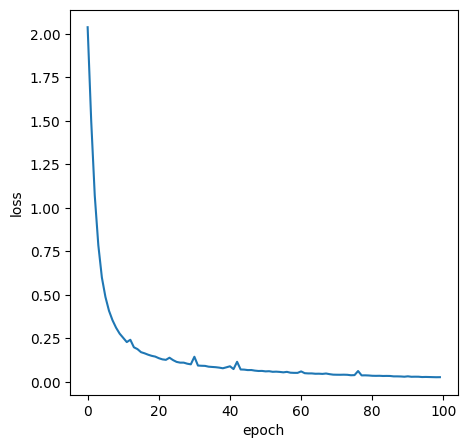

In [16]:
plt.plot(losses)
plt.xlabel('epoch')
plt.ylabel('loss')